# Curso: Data Science: análise de séries temporais para previsão

## Objetivos: 
* Use a biblioteca Statsmodels
* Trate dados de séries temporais
* Preveja valores em um gráfico
* Aprenda o método de HoltWinters
* Entenda para que serve a autocorrelação
* Conheça modelos autorregressivos


Link: https://cursos.alura.com.br/course/data-science-time-series

## 1 - Importando as bibliotecas

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 2 - Carregando a base de dados

In [2]:
co2 = pd.read_csv('datasets/co2.csv', delimiter='\t')
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [3]:
nasc = pd.read_csv('datasets/nascimentos.csv')
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


## 3 - Explorando os dados

In [4]:
print(f'O dataset co2 é formado por {co2.shape[0]} linhas e {co2.shape[1]} atributos')
print(f'O dataset nascimento é formado por {nasc.shape[0]} linhas e {nasc.shape[1]} atributos')

O dataset co2 é formado por 477 linhas e 2 atributos
O dataset nascimento é formado por 365 linhas e 2 atributos


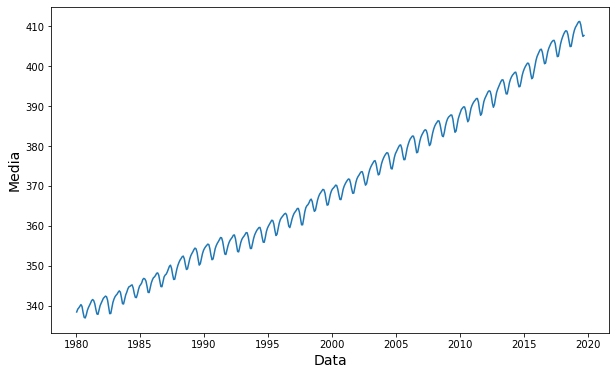

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(co2['data'], co2['media'])
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)

plt.show()

In [6]:
nasc['data'] = pd.to_datetime(nasc['data'])

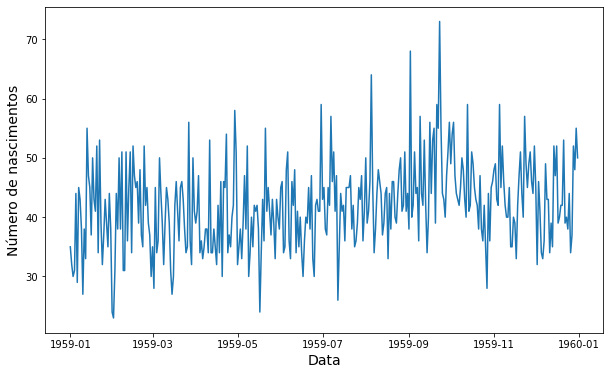

In [7]:
pd.plotting.register_matplotlib_converters()
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nasc['data'], nasc['n_nasc'])
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Número de nascimentos', fontsize=14)

plt.show()

## Previsão através de média

In [8]:
media_co2 = co2['media'].mean()
dt_co2 = co2.loc[1, 'data'] - co2.loc[0, 'data']

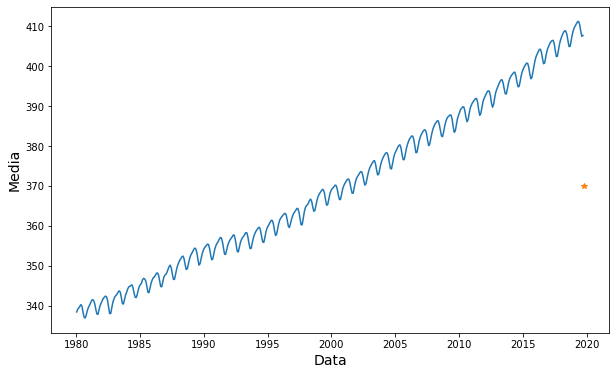

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(co2['data'], co2['media'])
ax.plot(co2.iloc[-1, 0]+dt_co2, media_co2, '*')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)

plt.show()

In [10]:
media_nasc = nasc['n_nasc'].mean()
dt_nasc = nasc.loc[1, 'data'] - nasc.loc[0, 'data']

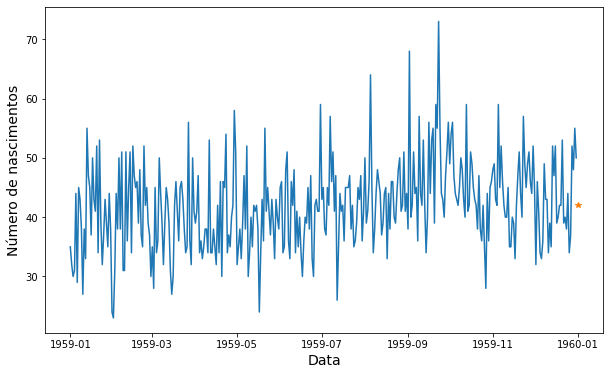

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nasc['data'], nasc['n_nasc'])
ax.plot(nasc.iloc[-1, 0]+dt_nasc, media_nasc, '*')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Número de nascimentos', fontsize=14)

plt.show()

In [12]:
media_tres_ultimas_emissoes_co2 = np.mean(co2.media[-3:])

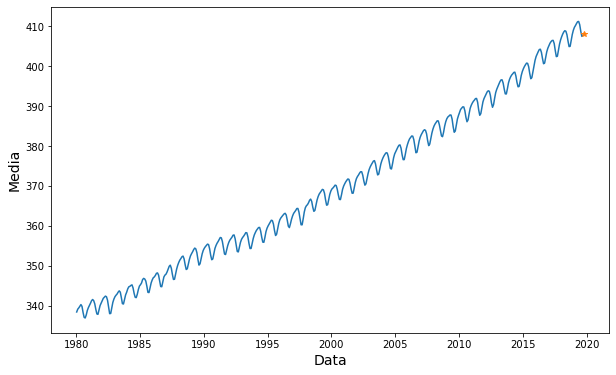

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(co2['data'], co2['media'])
ax.plot(co2.iloc[-1, 0]+dt_co2, media_tres_ultimas_emissoes_co2, '*')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)

plt.show()

In [14]:
nasc.loc[-20:,'n_nasc']

0      35
1      32
2      30
3      31
4      44
       ..
360    37
361    52
362    48
363    55
364    50
Name: n_nasc, Length: 365, dtype: int64

In [15]:
media_tres_ultimos_nasc = np.mean(nasc.n_nasc[-3:])

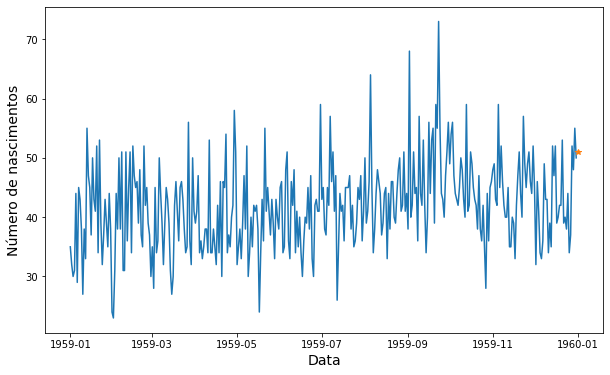

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nasc['data'], nasc['n_nasc'])
ax.plot(nasc.iloc[-1, 0]+dt_nasc, media_tres_ultimos_nasc, '*')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Número de nascimentos', fontsize=14)

plt.show()

### Decomposição da serie temporal

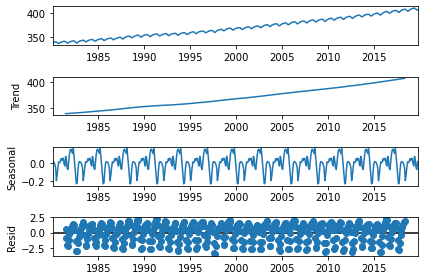

In [17]:
result_c = tsa.seasonal_decompose(co2.set_index('data'), period=35)
result_c.plot();

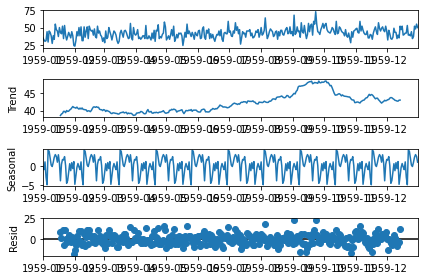

In [18]:
result_n = tsa.seasonal_decompose(nasc.set_index('data'), period=35)
result_n.plot();

### As séries temporárias são estacionarias?

Ou seja, suas propriedades são constantes ao longo da série.

Exemplo de propriedade: 
* Media
* Variância
* Auto correlação

In [19]:
c1, c2 = co2[:int(co2.shape[0]/2)].media, co2[int(co2.shape[0]/2):].media

In [20]:
c1.mean()

352.3155042016807

In [21]:
c2.mean()

387.8163598326361

In [22]:
c1.var()

74.21401894302024

In [23]:
c2.var()

152.1792240884638

A média e a variancia do dataset co2 variam muito, logo a série não é estacionária.

In [24]:
n1, n2 = nasc[:int(nasc.shape[0]/2)].n_nasc, nasc[int(nasc.shape[0]/2):].n_nasc

In [25]:
n1.mean()

39.76373626373626

In [26]:
n2.mean()

44.185792349726775

In [27]:
n1.var()

49.48530751016939

In [28]:
n2.var()

48.97628055005103

A média e a variancia do dataset nascimento é bem constante, logo podemos considerar a séria estácionaria

Outro teste para ver se a onda é estacionaria ou não

In [29]:
resultado_c  = tsa.adfuller(co2['media'].values)

print(f'Estatística ADF: {resultado_c[0]}')
print(f'p-valor: {resultado_c[1]}')


Estatística ADF: 3.0368288291669567
p-valor: 1.0


In [30]:
resultado_n  = tsa.adfuller(nasc['n_nasc'].values)

print(f'Estatística ADF: {resultado_n[0]}')
print(f'p-valor: {resultado_n[1]}')


Estatística ADF: -4.808291253559763
p-valor: 5.243412990149865e-05


Para que possamos fazer previsões em séries temporais, precisaremos garantir que elas sejam estacionárias.Caso contrário, será necessário levarmos em consideração características da série temporal que a tornam não-estacionária, no momento de previsão.

A diferenciação é uma transformação que pode ser aplicada para **remover a dependência temporal dos dados**, tornando a série estacionária.

diferenca(t) = serie(t) - serie(t-1)

Esta transformação deve ser revertida após a previsão para a obtenção dos valores corretos.

serie_recuperada = diferenca(t) + serie(t-1)

* Exemplo:

serie_diferenciada = nasc[‘n_nasc’].diff()

### Previsão por suavização

In [31]:
co2_data_index = co2.copy()
co2_data_index['data'] = pd.to_datetime(co2_data_index['data'])
co2_data_index = co2_data_index.set_index('data')
co2_treino_index = co2_data_index[1980:2015]
co2_teste_index = co2_data_index[2015:]

In [32]:
co2_treino = co2.set_index('data')[1980.042:2015]
co2_teste = co2.set_index('data')[2015:]
co2_teste.shape

(57, 1)

In [33]:
modelo_ajustado = tsa.SimpleExpSmoothing(co2_treino, initialization_method='heuristic').fit(smoothing_level=0.5)
modelo_previsto = modelo_ajustado.forecast(57)

E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


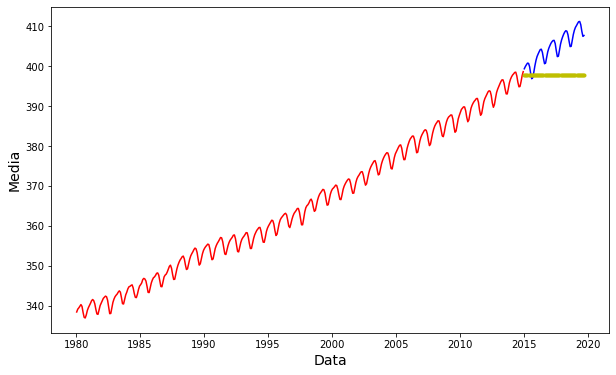

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(co2_treino.index, co2_treino, 'r')
ax.plot(co2_teste.index, co2_teste, 'b')
ax.plot(co2_teste.index, modelo_previsto, 'y.')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)

plt.show()

In [35]:
nasc_treino = nasc.set_index('data')['1959-01-01':'1959-12-01']
nasc_teste = nasc.set_index('data')['1959-12-01':]
nasc_teste.shape

(31, 1)

In [36]:
modelo_ajustado = tsa.SimpleExpSmoothing(nasc_treino, initialization_method='heuristic').fit(smoothing_level=0.5)
modelo_previsto = modelo_ajustado.forecast(31)

E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


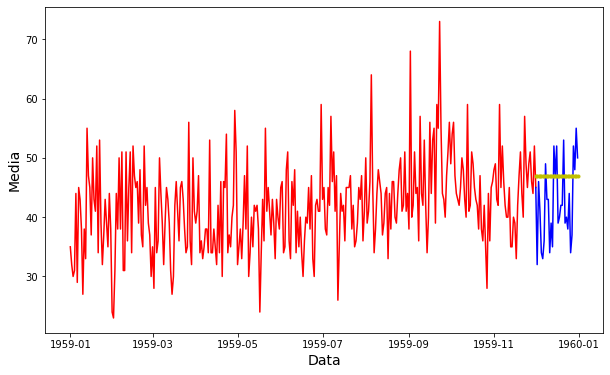

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nasc_treino.index, nasc_treino, 'r')
ax.plot(nasc_teste.index, nasc_teste, 'b')
ax.plot(nasc_teste.index, modelo_previsto, 'y.')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)

plt.show()

In [43]:
co2_treino.shape

(420, 1)

In [219]:
modelo_ajustado = tsa.ExponentialSmoothing(co2_treino.values, trend='additive', seasonal='additive',
                                           seasonal_periods=12, initialization_method='heuristic').fit()

modelo_previsto_suavizado = modelo_ajustado.predict(start=420, end=476)

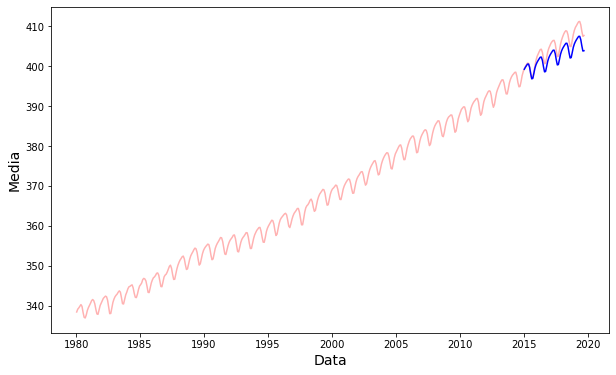

In [220]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(co2.data, co2.media, 'r', alpha=0.3)
ax.plot(co2_teste.index, modelo_previsto_suavizado, 'b')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)

plt.show()

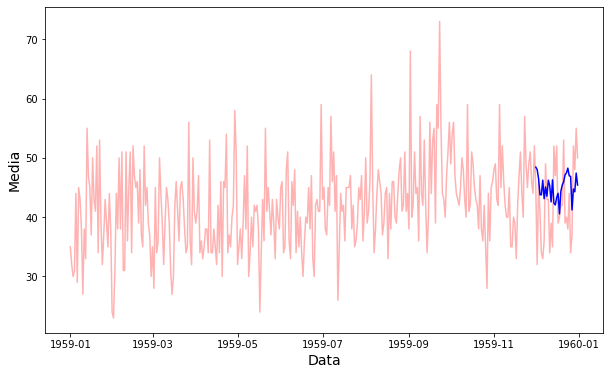

In [235]:
modelo_ajustado = tsa.ExponentialSmoothing(nasc_treino.values, trend=None, seasonal='additive',
                                           seasonal_periods=31, initialization_method='heuristic').fit()

modelo_previsto_suavizado = modelo_ajustado.predict(start=335, end=365)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nasc.data, nasc.n_nasc, 'r', alpha=0.3)
ax.plot(nasc_teste.index, modelo_previsto_suavizado, 'b')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)

plt.show()

### Auto correlação

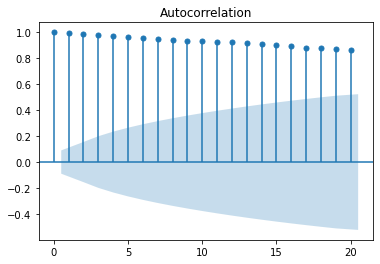

In [183]:
plot_acf(co2.set_index('data'), lags=20);

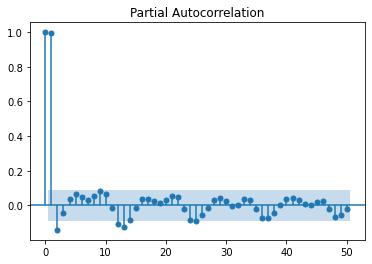

In [181]:
plot_pacf(co2.set_index('data'), lags=20);

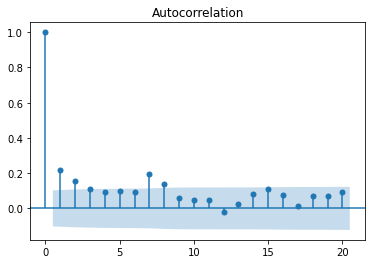

In [175]:
plot_acf(nasc.set_index('data'), lags=20);

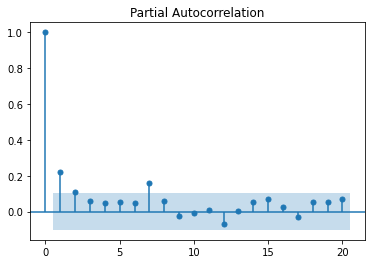

In [177]:
plot_pacf(nasc.set_index('data'), lags=20);

### Modelo Auto regressivo

In [188]:
lista = np.linspace(1,40,40)

E:\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


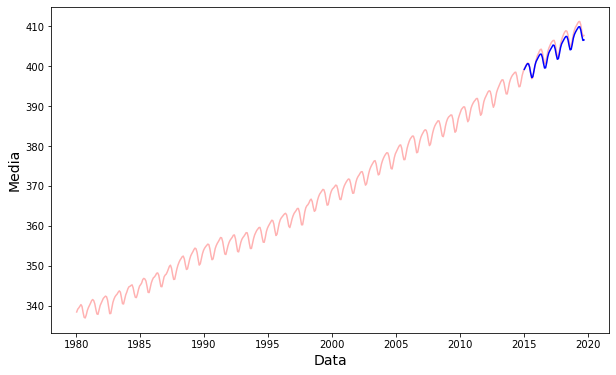

In [221]:
modelo_ajustado = AutoReg(co2_treino.values, lags=lista, trend='c', seasonal=True, period=35).fit()


modelo_previsto_ar = modelo_ajustado.predict(start=420, end=476)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(co2.data, co2.media, 'r', alpha=0.3)
ax.plot(co2_teste.index, modelo_previsto_ar, 'b')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)
plt.show()

E:\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


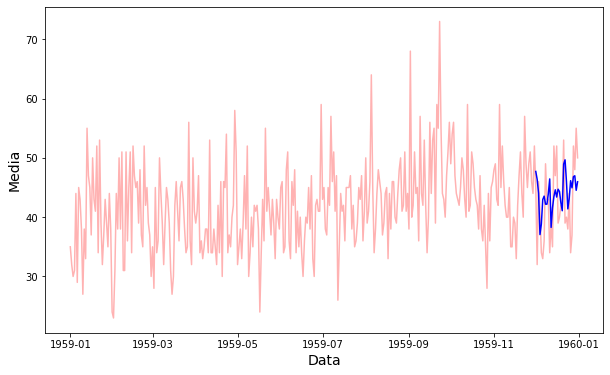

In [236]:
modelo_ajustado = AutoReg(nasc_treino.values, lags=lista, trend='c', seasonal=True, period=35).fit()

modelo_previsto_ar = modelo_ajustado.predict(start=335, end=365)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nasc.data, nasc.n_nasc, 'r', alpha=0.3)
ax.plot(nasc_teste.index, modelo_previsto_ar, 'b')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)

plt.show()

## Avaliando os modelos

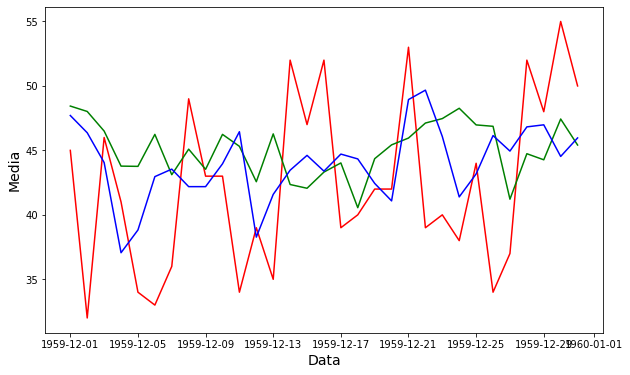

In [238]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nasc_teste.index, nasc_teste, 'r')
ax.plot(nasc_teste.index, modelo_previsto_suavizado, 'g')
ax.plot(nasc_teste.index, modelo_previsto_ar, 'b')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)
plt.show()

In [239]:
error_previsto_suavizado = nasc_teste['n_nasc'] - modelo_previsto_suavizado
error_previsto_ar = nasc_teste['n_nasc'] - modelo_previsto_ar

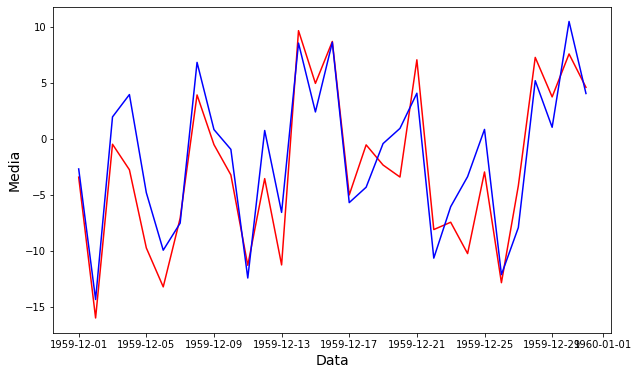

In [243]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nasc_teste.index, error_previsto_suavizado, 'r')
ax.plot(nasc_teste.index, error_previsto_ar, 'b')
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Media', fontsize=14)
plt.show()

In [244]:
np.mean(error_previsto_suavizado)

-2.667803114172874

In [245]:
np.mean(error_previsto_ar)

-1.6083080804510541

In [246]:
np.mean(np.abs(error_previsto_suavizado))

6.3683083648091205

In [247]:
np.mean(np.abs(error_previsto_ar))

5.496720548092115

In [248]:
mean_absolute_error(nasc_teste['n_nasc'], modelo_previsto_suavizado)

6.3683083648091205

In [249]:
mean_absolute_error(nasc_teste['n_nasc'], modelo_previsto_ar)

5.496720548092115

In [251]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_suavizado)

56.16359911678221

In [250]:
mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_ar)

45.43739422181629

In [254]:
np.sqrt(mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_suavizado))

7.494237727533215

In [256]:
np.sqrt(mean_squared_error(nasc_teste['n_nasc'], modelo_previsto_ar))

6.740726535160456